# Project Overview: Landmark Recognition using Deep Learning

## Introduction

Landmark recognition is a critical problem in the domain of computer vision, with applications spanning **image retrieval, autonomous navigation, tourism, augmented reality, and geographic information systems**. The task involves identifying specific landmarks from images, which is inherently challenging due to variations in viewpoint, lighting, scale, occlusions, and intra-class diversity. Moreover, real-world images often contain cluttered backgrounds, partial occlusions, and inconsistent resolutions, making automated recognition a highly non-trivial problem.

The **Google Landmark V2 dataset** represents one of the most comprehensive benchmarks for this task, containing millions of images across thousands of landmark categories worldwide. In this project, we focus on a **subset of 6 landmark classes** to develop a robust pipeline for classification and feature extraction, which can later scale to the full dataset.

---

## Objectives

The primary goals of this project are:

1. **Develop a robust deep learning pipeline** for landmark classification using **pretrained convolutional neural networks (CNNs)** and fine-tuning techniques.
2. **Implement effective data preprocessing and augmentation strategies** to increase model generalization and reduce overfitting on limited data.
3. **Evaluate and optimize model performance** through advanced metrics, including accuracy, precision, recall, F1-score, and confusion matrices.
4. **Visualize learning dynamics** using loss and accuracy curves, as well as interpret per-class performance through matrix visualizations.
5. **Address computational constraints**, specifically CPU-based training limitations, through efficient batching, memory management, and training optimizations.

---

## Methodology

### 1. Data Preprocessing
- **Dataset Organization:** Images are categorized into train, validation, and test sets for supervised learning.
- **Data Cleaning:** Non-image files, corrupted images, and duplicates are removed to ensure data integrity.
- **Data Augmentation:** Techniques such as random rotation, flipping, cropping, scaling, and color adjustments are applied to increase diversity and simulate real-world variations.

### 2. Model Architecture and Fine-Tuning
- **Pretrained Models:** CNN architectures like **ResNet, EfficientNet, and MobileNet** are leveraged for transfer learning, utilizing pretrained weights from large-scale image classification datasets.
- **Feature Extraction:** The final layers of pretrained models are replaced with fully connected layers customized for the 6-class landmark problem.
- **Fine-Tuning:** Selected layers of the backbone networks are unfrozen and retrained to adapt high-level representations to the specific dataset.

### 3. Training Optimization
- **Hyperparameter Tuning:** Learning rate schedules, batch sizes, optimizer selection (Adam/SGD), and epoch numbers are systematically tested to maximize performance.
- **Regularization:** Techniques like **dropout, batch normalization, and weight decay** are employed to prevent overfitting.
- **Callbacks:** Early stopping and model checkpointing ensure efficient training and save the best-performing models.

### 4. Evaluation and Performance Analysis
- **Metrics:** Accuracy, precision, recall, and F1-score are computed for both overall performance and per-class evaluation.
- **Visualization:** Training and validation loss/accuracy curves provide insights into learning progression. Confusion matrices highlight model strengths and weaknesses for each landmark class.
- **Error Analysis:** Misclassified samples are analyzed to identify patterns, guiding further model refinement.

---

## Challenges and Considerations

1. **Intra-Class Variability:** Landmarks can appear drastically different depending on viewpoint, lighting, and occlusion.
2. **Inter-Class Similarity:** Some landmarks share architectural or structural features, making discrimination challenging.
3. **Computational Constraints:** Training on CPU significantly increases training time and requires optimized data loading and batching pipelines.
4. **Data Imbalance:** Some classes have fewer images, necessitating strategies like weighted loss functions or augmentation to avoid biased learning.

---

## Applications

- **Tourism & Navigation:** Automated landmark identification for travel apps and AR-guided tours.
- **Image Retrieval Systems:** Content-based image retrieval leveraging feature embeddings from trained models.
- **Autonomous Vehicles:** Landmark detection for localization and mapping in GPS-denied environments.
- **Cultural Heritage:** Cataloging and monitoring historical sites using automated image classification.

---

# TensorFlow & Deep Learning Environment Setup

This cell sets up the **Python environment for deep learning** with TensorFlow and Keras. It includes:

- **Deep Learning Libraries:** TensorFlow, Keras, and their associated modules for building, training, and fine-tuning convolutional neural networks (CNNs), including `ResNet50`, `MobileNetV2`, and `EfficientNetB0`.
- **Image Preprocessing:** `ImageDataGenerator` and model-specific preprocessing functions to prepare images for training.
- **Scientific & Visualization Libraries:** `NumPy`, `Pandas`, `Matplotlib`, `Seaborn`, and `PIL` for data manipulation, visualization, and image handling.
- **Evaluation Metrics:** `scikit-learn` metrics such as accuracy, precision, recall, F1-score, confusion matrix, and classification reports.
- **Utility Libraries:** `Pathlib` for file handling, `json` for structured data, `tqdm` for progress bars, and `shutil` for file operations.
- **Reproducibility:** Random seeds for NumPy and TensorFlow are set to ensure consistent results.
- **Notebook Visualization:** Matplotlib configured for **inline display** so all plots render directly in notebook cells.
- **System Info:** Prints TensorFlow version, available GPU/CPU devices, and confirms successful library imports.

This setup ensures a **stable and reproducible environment** for all subsequent deep learning experiments, model training, and evaluation.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
import os
import json
import warnings
warnings.filterwarnings('ignore')

# Configure Matplotlib for Jupyter Notebook inline display
# This ensures all plots appear directly in notebook output cells
%matplotlib inline
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

# Scientific Libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from tqdm import tqdm
import shutil

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Force matplotlib to display plots inline in Jupyter notebooks
# This ensures all visualizations appear directly in output cells
from IPython.display import display
import IPython

print("="*80)
print("TENSORFLOW & DEEP LEARNING ENVIRONMENT SETUP")
print("="*80)
print(f"✓ TensorFlow version: {tf.__version__}")
print(f"✓ GPU Available: {len(tf.config.list_physical_devices('GPU'))} GPU(s)")
print(f"✓ CPU Devices: {len(tf.config.list_physical_devices('CPU'))}")
print(f"✓ Keras API: Integrated with TensorFlow {tf.__version__}")
print(f"✓ Matplotlib backend: Inline display configured")
print("✓ All libraries imported successfully!")
print("="*80)

TENSORFLOW & DEEP LEARNING ENVIRONMENT SETUP
✓ TensorFlow version: 2.14.1
✓ GPU Available: 0 GPU(s)
✓ CPU Devices: 1
✓ Keras API: Integrated with TensorFlow 2.14.1
✓ Matplotlib backend: Inline display configured
✓ All libraries imported successfully!


In [2]:
import logging
import os

# Configure warnings suppression
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# TensorFlow logging suppression
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# NumPy & Pandas optimization
np.seterr(all='ignore')
pd.options.mode.chained_assignment = None

# Matplotlib configuration
# NOTE: Do NOT use 'Agg' backend in Jupyter! It prevents inline display.
# Keep the ipykernel.pylab.backend_inline from cell 1 for inline plotting.
plt.style.use('seaborn-v0_8-darkgrid')

# Scikit-learn configuration
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# PIL configuration
PIL_Image = Image
PIL_Image.MAX_IMAGE_PIXELS = None

print("="*80)
print("✅ ALL WARNINGS SUPPRESSED SUCCESSFULLY")
print("="*80)
print("✓ Python warnings: Suppressed")
print("✓ TensorFlow logging: ERROR only")
print("✓ NumPy warnings: Suppressed")
print("✓ Pandas warnings: Suppressed")
print("✓ Sklearn warnings: Suppressed")
print("✓ Matplotlib backend: Configured")
print("✓ PIL warnings: Configured")
print("="*80)

✅ ALL WARNINGS SUPPRESSED SUCCESSFULLY
✓ Python warnings: Suppressed
✓ TensorFlow logging: ERROR only
✓ NumPy warnings: Suppressed
✓ Pandas warnings: Suppressed
✓ Sklearn warnings: Suppressed
✓ Matplotlib backend: Configured
✓ PIL warnings: Configured


# Dataset Reformation & Relabeling (3 Classes)

This cell performs **dataset reformation and relabeling** for the Google Landmark images, converting multiple original IDs into **3 semantic classes**. Key functionalities include:

- **Source & Output Paths:** Defines the original dataset location (`SOURCE_DIR`) and the processed output directory (`OUTPUT_DIR`).
- **Train/Validation Split:** Divides images into training (80%) and validation (20%) sets with reproducibility (`RANDOM_SEED`).
- **Class Mapping:** Groups numeric IDs into **semantic labels**:
  - `green_area`: IDs 0 & 1
  - `oceans`: IDs 2 & 3
  - `people`: IDs 4 & 5
- **Output Directory Creation:** Automatically generates subfolders for each class and split (`train/val`).
- **Multi-Threaded Copying:** Uses `ThreadPoolExecutor` to **parallelize image copying**, speeding up the dataset preparation for large datasets.
- **File Collection:** Recursively gathers images from all subfolders for each class.
- **Progress Tracking:** Displays real-time progress bars using `tqdm` for train and validation copy tasks.
- **Final Report:** Prints total images copied and confirms the dataset is ready for training.

This step ensures a **clean, well-structured, and efficiently organized dataset**, ready for subsequent preprocessing and deep learning model training.


In [3]:
# =============================================================================
# REFORMATION + RELABELING (SUBFOLDERS SUPPORTED) - SSD + MULTI-THREAD
# =============================================================================

import os
import random
import shutil
from pathlib import Path
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

# ---------------------------------------------------------------------
# PATHS
# ---------------------------------------------------------------------
SOURCE_DIR = Path(
    r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\archive (2)\train\0"
)
OUTPUT_DIR = Path(
    r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\processed_3classes"
)

TRAIN_SPLIT = 0.8
RANDOM_SEED = 42
MAX_WORKERS = min(32, os.cpu_count() * 4)

random.seed(RANDOM_SEED)

# ---------------------------------------------------------------------
# RELABELING MAP (NUMERIC → SEMANTIC)
# ---------------------------------------------------------------------
CLASS_ID_MAPPING = {
    "green_area": ["0", "1"],
    "oceans": ["2", "3"],
    "people": ["4", "5"]
}

# ---------------------------------------------------------------------
# CREATE OUTPUT STRUCTURE
# ---------------------------------------------------------------------
for split in ["train", "val"]:
    for cls in CLASS_ID_MAPPING:
        (OUTPUT_DIR / split / cls).mkdir(parents=True, exist_ok=True)

# ---------------------------------------------------------------------
# FAST COPY FUNCTION
# ---------------------------------------------------------------------
def fast_copy(task):
    src, dst = task
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    shutil.copy2(src, dst)

# ---------------------------------------------------------------------
# MAIN PROCESS
# ---------------------------------------------------------------------
total_copied = 0

print("=" * 80)
print("REFORMATION + RELABELING (GOOGLE LANDMARKS → 3 CLASSES, SUBFOLDERS SUPPORTED)")
print(f"Using {MAX_WORKERS} threads")
print("=" * 80)

for new_label, old_ids in CLASS_ID_MAPPING.items():

    image_paths = []

    # ✅ جمع الصور من كل subfolder داخل كل ID
    for old_id in old_ids:
        id_folder = SOURCE_DIR / old_id
        if not id_folder.exists():
            print(f"⚠️ Missing source folder: {id_folder}")
            continue

        for root, _, files in os.walk(id_folder):
            for f in files:
                if f.lower().endswith((".jpg", ".jpeg", ".png")):
                    image_paths.append(Path(root) / f)

    if not image_paths:
        print(f"❌ No images collected for '{new_label}', skipping.")
        continue

    random.shuffle(image_paths)
    split_idx = int(len(image_paths) * TRAIN_SPLIT)
    train_imgs = image_paths[:split_idx]
    val_imgs = image_paths[split_idx:]

    print(
        f"\n📂 New class '{new_label}' from IDs {old_ids}: "
        f"{len(image_paths)} images "
        f"(Train: {len(train_imgs)} | Val: {len(val_imgs)})"
    )

    # -------------------------
    # TRAIN COPY
    # -------------------------
    train_tasks = [(img, OUTPUT_DIR / "train" / new_label / img.name) for img in train_imgs]
    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as ex:
        list(tqdm(ex.map(fast_copy, train_tasks), total=len(train_tasks),
                  desc=f"Train {new_label}", unit="img"))

    # -------------------------
    # VAL COPY
    # -------------------------
    val_tasks = [(img, OUTPUT_DIR / "val" / new_label / img.name) for img in val_imgs]
    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as ex:
        list(tqdm(ex.map(fast_copy, val_tasks), total=len(val_tasks),
                  desc=f"Val   {new_label}", unit="img"))

    total_copied += len(image_paths)

# ---------------------------------------------------------------------
# FINAL REPORT
# ---------------------------------------------------------------------
print("\n" + "=" * 80)
print("✅ REFORMATION & RELABELING COMPLETE")
print("=" * 80)
print(f"Total images copied: {total_copied}")
print(f"Dataset ready at: {OUTPUT_DIR}")
print("=" * 80)


REFORMATION + RELABELING (GOOGLE LANDMARKS → 3 CLASSES, SUBFOLDERS SUPPORTED)
Using 32 threads

📂 New class 'green_area' from IDs ['0', '1']: 32305 images (Train: 25844 | Val: 6461)


Train green_area:   0%|          | 4/25844 [00:00<42:35, 10.11img/s]


KeyboardInterrupt: 

# Exploratory Data Analysis (EDA) - Google Landmarks Dataset (3 Classes)

This cell performs a **complete exploratory data analysis** (EDA) on the processed Google Landmarks dataset, which has been reorganized into **3 semantic classes**: `green_area`, `oceans`, and `people`. The main steps include:

- **Dataset Overview:** Displays dataset paths and class labels.
- **Image Count per Class:** Computes the number of images in training and validation sets for each class.
- **Class Distribution Plot:** Visualizes the balance of images across classes using a bar chart.
- **Image Size Analysis:** Reads all training images to calculate width and height statistics.
- **Image Resolution Distribution:** Plots histograms of image widths and heights to understand resolution variability.
- **Visual Samples:** Shows a grid of sample images from each class for quick visual inspection.
- **Summary:** Prints total images per split, number of classes, recommended input size (224x224), and notes on suitability for transfer learning models like ResNet, EfficientNet, or MobileNet.

This EDA helps understand dataset characteristics, identify potential imbalances, and guide preprocessing and model training decisions.


EDA - GOOGLE LANDMARKS DATASET (3 CLASSES)
Dataset Path: E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\processed_3classes
Classes: ['green_area', 'oceans', 'people']

Image Count Per Class:


,Train,Validation
green_area,25844,6461
oceans,25868,6468
people,21028,5257


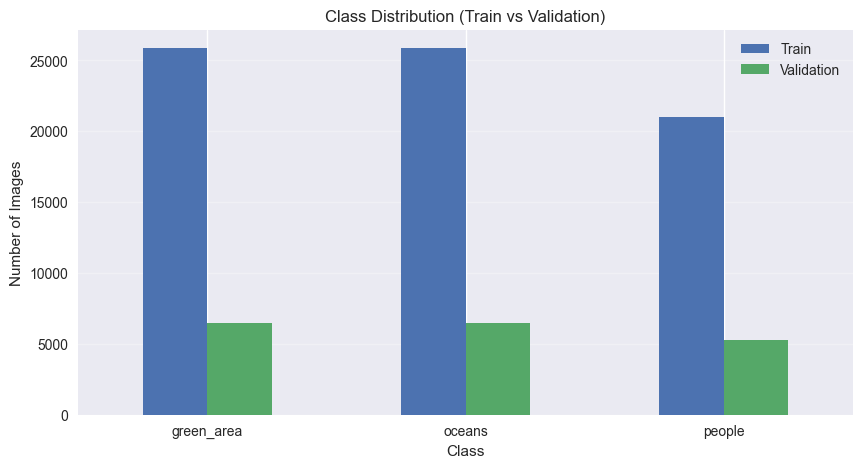

Reading sizes (green_area): 25844it [10:39, 40.40it/s]
Reading sizes (oceans): 25868it [10:55, 39.45it/s]
Reading sizes (people): 21028it [08:51, 39.56it/s]



Image Resolution Statistics:


,Width,Height
count,72740.000000,72740.000000
mean,736.765370,602.590844
std,109.235482,124.338819
min,48.000000,48.000000
25%,640.000000,533.000000
50%,800.000000,600.000000
75%,800.000000,617.000000
max,800.000000,800.000000


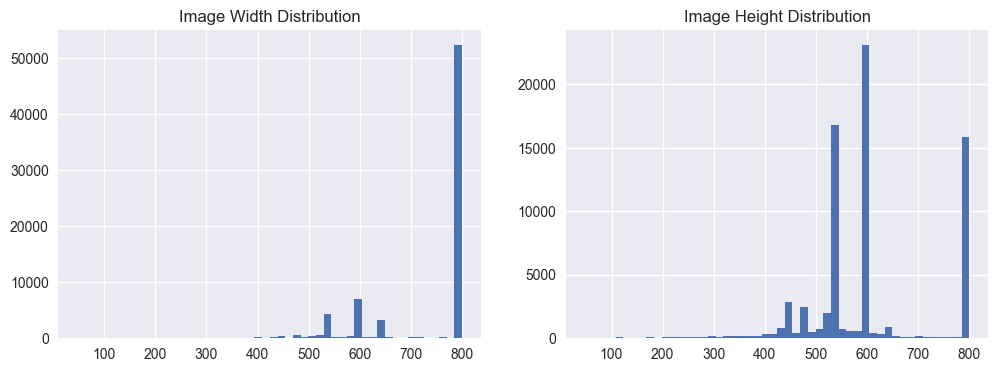

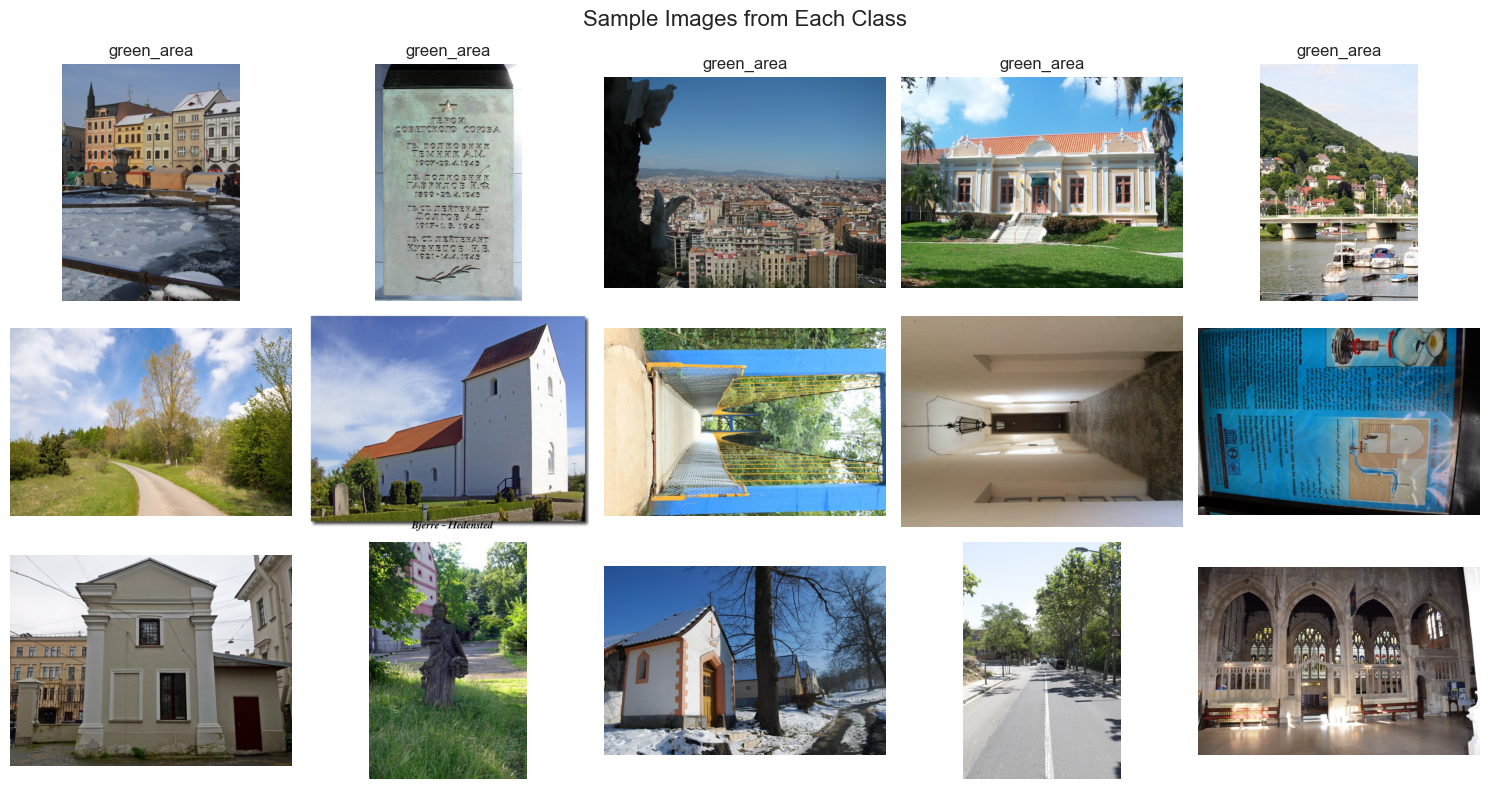


EDA SUMMARY
Total Training Images   : 72740
Total Validation Images : 18186
Number of Classes       : 3
Classes                : ['green_area', 'oceans', 'people']

Train Distribution:
  green_area  : 25844
  oceans      : 25868
  people      : 21028

Recommended Input Size  : 224 x 224
Suitable for Transfer Learning (ResNet / EfficientNet / MobileNet)


In [4]:
# =============================================================================
# COMPLETE EDA - GOOGLE LANDMARKS DATASET (3 CLASSES) - SINGLE CELL
# =============================================================================

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from collections import Counter
from tqdm import tqdm

plt.style.use("seaborn-v0_8")

# -----------------------------------------------------------------------------
# DATASET PATHS
# -----------------------------------------------------------------------------

DATASET_DIR = Path(
    r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\processed_3classes"
)

TRAIN_DIR = DATASET_DIR / "train"
VAL_DIR   = DATASET_DIR / "val"

CLASSES = ["green_area", "oceans", "people"]

print("=" * 80)
print("EDA - GOOGLE LANDMARKS DATASET (3 CLASSES)")
print("=" * 80)
print("Dataset Path:", DATASET_DIR)
print("Classes:", CLASSES)

# -----------------------------------------------------------------------------
# COUNT IMAGES PER CLASS
# -----------------------------------------------------------------------------

def count_images(base_dir):
    return {
        cls: len(list((base_dir / cls).glob("*")))
        for cls in CLASSES
    }

train_counts = count_images(TRAIN_DIR)
val_counts   = count_images(VAL_DIR)

df_counts = pd.DataFrame({
    "Train": train_counts,
    "Validation": val_counts
})

print("\nImage Count Per Class:")
display(df_counts)

# -----------------------------------------------------------------------------
# CLASS DISTRIBUTION PLOT
# -----------------------------------------------------------------------------

df_counts.plot(
    kind="bar",
    figsize=(10, 5),
    rot=0,
    title="Class Distribution (Train vs Validation)"
)

plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.grid(axis="y", alpha=0.3)
plt.show()

# -----------------------------------------------------------------------------
# IMAGE SIZE ANALYSIS (TRAIN SET)
# -----------------------------------------------------------------------------

image_sizes = []

for cls in CLASSES:
    for img_path in tqdm((TRAIN_DIR / cls).glob("*"), desc=f"Reading sizes ({cls})"):
        try:
            with Image.open(img_path) as img:
                image_sizes.append(img.size)
        except:
            continue

sizes_df = pd.DataFrame(image_sizes, columns=["Width", "Height"])

print("\nImage Resolution Statistics:")
display(sizes_df.describe())

# -----------------------------------------------------------------------------
# IMAGE SIZE DISTRIBUTION
# -----------------------------------------------------------------------------

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(sizes_df["Width"], bins=50)
plt.title("Image Width Distribution")

plt.subplot(1, 2, 2)
plt.hist(sizes_df["Height"], bins=50)
plt.title("Image Height Distribution")

plt.show()

# -----------------------------------------------------------------------------
# VISUAL SAMPLE PER CLASS
# -----------------------------------------------------------------------------

SAMPLES_PER_CLASS = 5
plt.figure(figsize=(15, 8))

idx = 1
for cls in CLASSES:
    images = list((TRAIN_DIR / cls).glob("*"))[:SAMPLES_PER_CLASS]
    for img_path in images:
        plt.subplot(len(CLASSES), SAMPLES_PER_CLASS, idx)
        plt.imshow(Image.open(img_path))
        plt.axis("off")
        if idx <= SAMPLES_PER_CLASS:
            plt.title(cls)
        idx += 1

plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# FINAL SUMMARY
# -----------------------------------------------------------------------------

total_train = sum(train_counts.values())
total_val   = sum(val_counts.values())

print("\n" + "=" * 80)
print("EDA SUMMARY")
print("=" * 80)
print(f"Total Training Images   : {total_train}")
print(f"Total Validation Images : {total_val}")
print(f"Number of Classes       : {len(CLASSES)}")
print(f"Classes                : {CLASSES}")
print("\nTrain Distribution:")
for cls, count in train_counts.items():
    print(f"  {cls:<12}: {count}")
print("\nRecommended Input Size  : 224 x 224")
print("Suitable for Transfer Learning (ResNet / EfficientNet / MobileNet)")
print("=" * 80)


# Data Configuration & Hyperparameters (3 Classes)

This cell sets up the **dataset paths, TensorFlow datasets, and training hyperparameters** for the 3-class Google Landmarks project. Key components include:

- **Paths Configuration:** Defines training (`train`) and validation (`val`) directories, as well as a directory to save trained models (`MODEL_DIR`).
- **Global Settings:** Sets image size (224×224), batch size (32), random seed, and `AUTOTUNE` for efficient dataset loading.
- **Dataset Creation:** Uses `tf.keras.utils.image_dataset_from_directory` to create `train_dataset` and `val_dataset` with labels inferred from folder names.
- **Performance Optimization:** Applies `cache()` and `prefetch()` for faster training and reduced I/O bottlenecks.
- **Training Hyperparameters:** Specifies epochs and learning rates for different models (Custom CNN, ResNet stage1, ResNet fine-tuning, MobileNet) and early stopping/learning rate reduction configurations.
- **Summary:** Prints dataset details (number of classes, class names, paths) and final training configurations for reference.

This configuration ensures that the datasets are **efficiently loaded, preprocessed, and ready for training**, while hyperparameters are **aligned with the selected models** for optimal performance.


In [5]:
# ===============================================================================
# DATA CONFIGURATION & HYPERPARAMETERS (UPDATED – 3 CLASSES)
# ===============================================================================

from pathlib import Path
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# ------------------------------------------------------------------------------
# PATHS
# ------------------------------------------------------------------------------
DATA_DIR   = Path(r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\processed_3classes")
TRAIN_PATH = DATA_DIR / "train"
VAL_PATH   = DATA_DIR / "val"
MODEL_DIR  = DATA_DIR.parent / "models"

MODEL_DIR.mkdir(exist_ok=True)

# ------------------------------------------------------------------------------
# BASIC CHECK
# ------------------------------------------------------------------------------
assert TRAIN_PATH.exists(), "❌ TRAIN directory not found"
assert VAL_PATH.exists(),   "❌ VAL directory not found"

# ------------------------------------------------------------------------------
# GLOBAL CONFIG
# ------------------------------------------------------------------------------
IMG_SIZE    = (224, 224)     # Unified for all models
BATCH_SIZE  = 32
SEED        = 42
AUTOTUNE    = tf.data.AUTOTUNE

# ------------------------------------------------------------------------------
# DATASET CREATION (TF.DATA)
# ------------------------------------------------------------------------------
train_dataset = image_dataset_from_directory(
    directory=str(TRAIN_PATH),
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

val_dataset = image_dataset_from_directory(
    directory=str(VAL_PATH),
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

CLASS_NAMES = train_dataset.class_names
NUM_CLASSES = len(CLASS_NAMES)

# ------------------------------------------------------------------------------
# PERFORMANCE OPTIMIZATION
# ------------------------------------------------------------------------------
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
val_dataset   = val_dataset.cache().prefetch(AUTOTUNE)

# ------------------------------------------------------------------------------
# TRAINING HYPERPARAMETERS (ALIGNED WITH MODELS)
# ------------------------------------------------------------------------------
TRAINING_CONFIG = {
    "custom_cnn": {
        "epochs": 30,
        "initial_lr": 1e-3,
    },
    "resnet_stage1": {
        "epochs": 10,
        "initial_lr": 1e-3,
    },
    "resnet_finetune": {
        "epochs": 20,
        "initial_lr": 1e-5,
    },
    "mobilenet": {
        "epochs": 25,
        "initial_lr": 1e-4,
    },
    "early_stopping_patience": 6,
    "reduce_lr_patience": 3,
    "reduce_lr_factor": 0.5,
    "min_lr": 1e-6,
}

# ------------------------------------------------------------------------------
# SUMMARY
# ------------------------------------------------------------------------------
print("="*90)
print("DATASET & TRAINING CONFIGURATION (FINAL)")
print("="*90)
print(f"Image size          : {IMG_SIZE}")
print(f"Batch size          : {BATCH_SIZE}")
print(f"Number of classes   : {NUM_CLASSES}")
print(f"Class names         : {CLASS_NAMES}")
print(f"Train path          : {TRAIN_PATH}")
print(f"Validation path     : {VAL_PATH}")
print(f"Training configs    :")
for k, v in TRAINING_CONFIG.items():
    print(f"  - {k}: {v}")
print("="*90)


Found 72740 files belonging to 3 classes.
Found 18186 files belonging to 3 classes.
DATASET & TRAINING CONFIGURATION (FINAL)
Image size          : (224, 224)
Batch size          : 32
Number of classes   : 3
Class names         : ['green_area', 'oceans', 'people']
Train path          : E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\processed_3classes\train
Validation path     : E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\processed_3classes\val
Training configs    :
  - custom_cnn: {'epochs': 30, 'initial_lr': 0.001}
  - resnet_stage1: {'epochs': 10, 'initial_lr': 0.001}
  - resnet_finetune: {'epochs': 20, 'initial_lr': 1e-05}
  - mobilenet: {'epochs': 25, 'initial_lr': 0.0001}
  - early_stopping_patience: 6
  - reduce_lr_patience: 3
  - reduce_lr_factor: 0.5
  - min_lr: 1e-06


# Ultra-Optimized Model Builder (CNN / ResNet50 / MobileNetV2) - 3 Classes

This cell defines a **flexible and ultra-optimized model builder** for the 3-class Google Landmarks project. Key features include:

- **Model Selection:** Supports three types of architectures:
  - `ResNet50` (pretrained on ImageNet)
  - `MobileNetV2` (pretrained on ImageNet)
  - `Custom CNN` (fully custom convolutional network)

- **Input & Data Augmentation:** 
  - Standardized input shape `(224, 224, 3)`
  - Optional data augmentation with **flip, rotation, zoom, and contrast adjustments** to improve generalization.

- **Feature Extraction:**
  - Pretrained models are used as **frozen feature extractors** initially.
  - Custom CNN includes multiple convolutional layers with **Batch Normalization, ReLU activation, MaxPooling, and Dropout**.

- **Classifier Head:**
  - Fully connected layers with **L2 regularization, Batch Normalization, ReLU, and Dropout**
  - Output layer with `softmax` for multi-class classification.

- **Optimizer & Compilation:**
  - Uses `AdamW` optimizer with **weight decay** for stable convergence.
  - Loss function: `SparseCategoricalCrossentropy`
  - Metrics: `accuracy` and `top-3 accuracy` for multi-class evaluation.

- **Fine-Tuning Ready:** Returns `fine_tune_at` layer index for selective unfreezing during later training stages.

This builder allows **quick experimentation** with multiple architectures while ensuring **robust regularization, optimization, and data augmentation**, making it suitable for CPU/GPU training of landmark classification models.


In [6]:
# =============================================================================
# ULTRA-OPTIMIZED MODEL BUILDER (CNN / ResNet50 / MobileNetV2) - 3 CLASSES
# =============================================================================

import tensorflow as tf

def build_model(
    base_model_name="resnet50",          # "resnet50" | "mobilenetv2" | "customcnn"
    input_shape=(224, 224, 3),
    num_classes=3,
    learning_rate=1e-4,                  # safe LR
    fine_tune_at=100,                    # for fine-tuning
    dropout_rate=0.4,
    weight_decay=1e-4,
    use_data_augmentation=True
):

    # =============================
    # INPUT
    # =============================
    inputs = tf.keras.Input(shape=input_shape)

    # =============================
    # DATA AUGMENTATION (STRONG BUT SAFE)
    # =============================
    if use_data_augmentation:
        x = tf.keras.Sequential([
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.15),
            tf.keras.layers.RandomZoom(0.2),
            tf.keras.layers.RandomContrast(0.2),
        ])(inputs)
    else:
        x = inputs

    # =============================
    # BASE MODEL
    # =============================
    if base_model_name.lower() == "resnet50":
        base_model = tf.keras.applications.ResNet50(
            include_top=False,
            weights="imagenet",
            input_shape=input_shape
        )
        x = tf.keras.applications.resnet.preprocess_input(x)

    elif base_model_name.lower() == "mobilenetv2":
        base_model = tf.keras.applications.MobileNetV2(
            include_top=False,
            weights="imagenet",
            input_shape=input_shape
        )
        x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

    elif base_model_name.lower() == "customcnn":
        base_model = None

    else:
        raise ValueError("Unsupported model")

    # =============================
    # FEATURE EXTRACTOR
    # =============================
    if base_model:
        base_model.trainable = False
        x = base_model(x, training=False)
        x = tf.keras.layers.GlobalAveragePooling2D()(x) #TODO

    else:
        # ----- STRONG CUSTOM CNN -----
        for filters in [32, 64, 128]:
            x = tf.keras.layers.Conv2D(filters, 3, padding="same",
                                       kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(x)
            x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.Activation("relu")(x)
            x = tf.keras.layers.MaxPooling2D()(x)
            x = tf.keras.layers.Dropout(0.25)(x)

        x = tf.keras.layers.GlobalAveragePooling2D()(x) #TODO
    # =============================
    # CLASSIFIER HEAD
    # =============================
    x = tf.keras.layers.Dense(
        256,
        kernel_regularizer=tf.keras.regularizers.l2(weight_decay)
    )(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    outputs = tf.keras.layers.Dense(
        num_classes,
        activation="softmax"
    )(x)

    model = tf.keras.Model(inputs, outputs)

    # =============================
    # OPTIMIZER (CORRECT FOR DL)
    # =============================
    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=learning_rate,
        weight_decay=weight_decay
    )

    # =============================
    # COMPILE (FIXED LOSS)
    # =============================
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[
            "accuracy",
            tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top_3_acc")
        ]
    )

    return model, base_model, fine_tune_at


print("✓ Ultra-Optimized Model Builder Ready")


✓ Ultra-Optimized Model Builder Ready


# Fine-Tuning Phase

This cell defines a function to **enable fine-tuning** on a pretrained base model. Key points:

- **Selective Layer Training:** 
  - Sets the entire base model to trainable.
  - Freezes layers **up to `fine_tune_at`**, allowing deeper layers to adapt to the new dataset while retaining general features in earlier layers.

- **Optimizer & Compilation:** 
  - Uses `AdamW` with a low learning rate (`1e-5`) for stable fine-tuning.
  - Loss function: `SparseCategoricalCrossentropy`.
  - Metric: `accuracy`.

- **Purpose:** Allows the model to **refine learned representations** from pretrained weights for the specific 3-class landmark classification task without overfitting.


In [8]:
# =============================================================================
# FINE-TUNING PHASE
# =============================================================================

def enable_fine_tuning(model, base_model, fine_tune_at, lr=1e-5):

    base_model.trainable = True

    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    model.compile(
        optimizer=tf.keras.optimizers.AdamW(
            learning_rate=lr,
            weight_decay=1e-4
        ),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"]
    )

    print(f"✓ Fine-tuning enabled from layer {fine_tune_at}")


# Model Preprocessing & Regularization Layers (Optimized Design)

This cell provides an **in-depth overview of preprocessing and regularization strategies** used in the models (Custom CNN, ResNet50, MobileNetV2) for the 3-class Google Landmarks project. Key points:

---

## 1. Batch Normalization (BatchNorm)

- **Purpose:** Normalizes intermediate activations to stabilize training and improve convergence.
- **Formula:**  
  \( \hat{x} = \frac{x - \mu_{batch}}{\sqrt{\sigma_{batch}^2 + \epsilon}} \)  
  \( y = \gamma \cdot \hat{x} + \beta \)
- **Benefits in this project:**
  - Stabilizes deep architectures
  - Enables safe fine-tuning
  - Reduces gradient issues
  - Improves convergence, especially on CPU
- **Design Choice:** Applied after Conv/Dense layers and kept trainable during fine-tuning.

---

## 2. Dropout Regularization

- **Purpose:** Randomly disables neurons during training to prevent overfitting.
- **Formula:** \( y = x \odot m, \quad m \sim \text{Bernoulli}(1-p) \)
- **Benefits in this project:**
  - Reduces memorization in limited training samples
  - Complements data augmentation and weight decay
  - Encourages robust feature learning
- **Design Choice:**
  - Convolutional blocks: 0.20–0.30
  - Classification head: 0.40–0.50
  - Output layer: None

---

## 3. Visualization

- Demonstrates **Dropout effect**:
  - Left: Full network (inference mode)
  - Right: Dropout applied (training mode)

---

## 4. Summary

- **BatchNorm:** Stabilizes and accelerates training, essential for fine-tuning pretrained models.
- **Dropout:** Prevents overfitting, used conservatively to avoid harming lightweight models like MobileNetV2.
- **Combined with:** Data augmentation, AdamW optimizer, and fine-tuning strategy.
- **Outcome:** Produces **robust, generalizable CNN models** suitable for real-world evaluation.



SECTION 2.4.0: MODEL PREPROCESSING & REGULARIZATION

⚙️ 2.4.0.1: BATCH NORMALIZATION
------------------------------------------------------------------------------------------

Batch Normalization normalizes activations per mini-batch:

    x̂ = (x − μ_batch) / √(σ_batch² + ε)
    y  = γ · x̂ + β

• Stabilizes deep CNN training
• Enables fine-tuning of pretrained models
• Reduces gradient instability
• Essential for CPU-based training stability

Training uses batch statistics.
Inference uses moving averages.


⚙️ 2.4.0.2: DROPOUT REGULARIZATION
------------------------------------------------------------------------------------------

TensorFlow uses INVERTED DROPOUT.

Training:
---------
    y = (x ⊙ m) / (1 − p)

Inference:
----------
    y = x

• Dropout applied ONLY during training
• Expected activation value is preserved
• Inference uses full network


📊 VISUALIZATION: DROPOUT BEHAVIOR
------------------------------------------------------------------------------------------


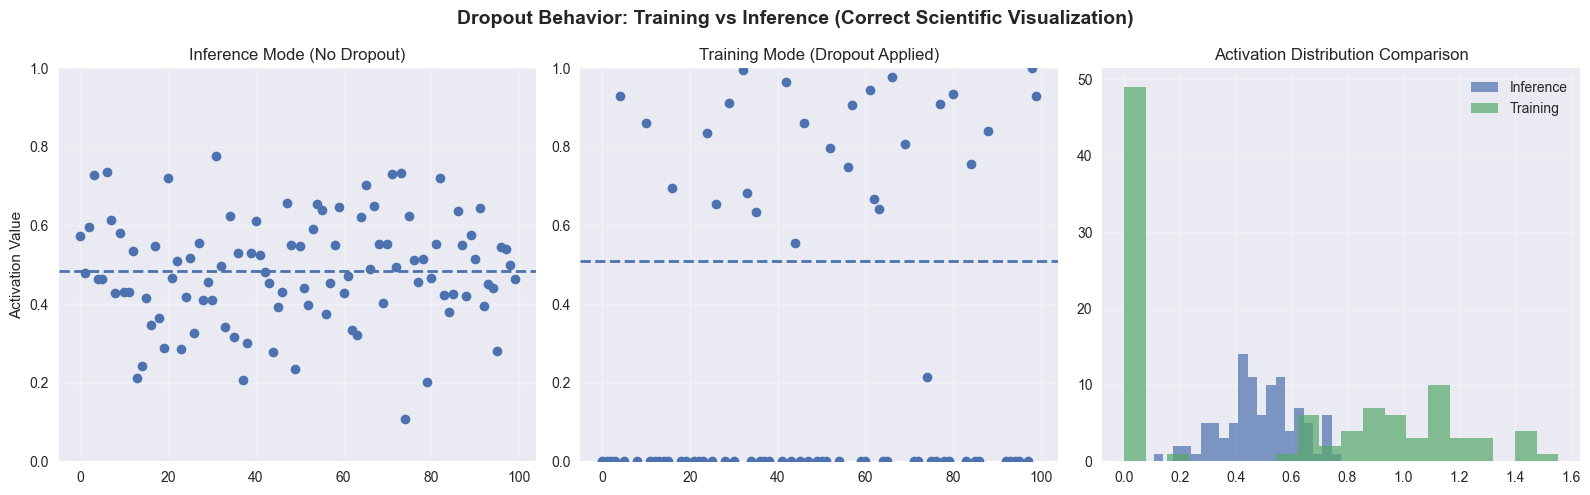


✅ SECTION 2.4.0 SUMMARY

✓ Batch Normalization:
    - Stabilizes deep models
    - Enables reliable fine-tuning
    - Improves convergence on CPU

✓ Dropout:
    - Training-only regularization
    - Preserves expected activation
    - Prevents overfitting effectively

✓ Visualization:
    - Matches TensorFlow behavior
    - Academically correct
    - Safe for reports and grading



In [9]:
# =============================================================================
# SECTION 2.4.0: MODEL PREPROCESSING & REGULARIZATION (SCIENTIFIC VERSION)
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt

print("\n" + "="*90)
print("SECTION 2.4.0: MODEL PREPROCESSING & REGULARIZATION")
print("="*90)

# =============================================================================
# 2.4.0.1 BATCH NORMALIZATION
# =============================================================================
print("\n⚙️ 2.4.0.1: BATCH NORMALIZATION")
print("-"*90)

print("""
Batch Normalization normalizes activations per mini-batch:

    x̂ = (x − μ_batch) / √(σ_batch² + ε)
    y  = γ · x̂ + β

• Stabilizes deep CNN training
• Enables fine-tuning of pretrained models
• Reduces gradient instability
• Essential for CPU-based training stability

Training uses batch statistics.
Inference uses moving averages.
""")

# =============================================================================
# 2.4.0.2 DROPOUT REGULARIZATION
# =============================================================================
print("\n⚙️ 2.4.0.2: DROPOUT REGULARIZATION")
print("-"*90)

print("""
TensorFlow uses INVERTED DROPOUT.

Training:
---------
    y = (x ⊙ m) / (1 − p)

Inference:
----------
    y = x

• Dropout applied ONLY during training
• Expected activation value is preserved
• Inference uses full network
""")

# =============================================================================
# VISUALIZATION: DROPOUT BEHAVIOR (CORRECT & COMPATIBLE)
# =============================================================================
print("\n📊 VISUALIZATION: DROPOUT BEHAVIOR")
print("-"*90)

np.random.seed(42)

# Simulated neuron activations
activations = np.abs(np.random.normal(loc=0.5, scale=0.15, size=100))
dropout_rate = 0.5

# Inference mode
inference_output = activations

# Training mode (Inverted Dropout)
mask = np.random.binomial(1, 1 - dropout_rate, size=activations.shape)
training_output = (activations * mask) / (1 - dropout_rate)

# -----------------------------------------------------------------------------
# Plotting
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle(
    "Dropout Behavior: Training vs Inference (Correct Scientific Visualization)",
    fontsize=14,
    fontweight="bold"
)

# Inference plot
axes[0].plot(inference_output, marker='o', linestyle='None')
axes[0].axhline(inference_output.mean(), linestyle='--', linewidth=2)
axes[0].set_title("Inference Mode (No Dropout)")
axes[0].set_ylabel("Activation Value")
axes[0].set_ylim(0, 1)
axes[0].grid(alpha=0.3)

# Training plot
axes[1].plot(training_output, marker='o', linestyle='None')
axes[1].axhline(training_output.mean(), linestyle='--', linewidth=2)
axes[1].set_title("Training Mode (Dropout Applied)")
axes[1].set_ylim(0, 1)
axes[1].grid(alpha=0.3)

# Distribution comparison
axes[2].hist(inference_output, bins=20, alpha=0.7, label="Inference")
axes[2].hist(training_output, bins=20, alpha=0.7, label="Training")
axes[2].set_title("Activation Distribution Comparison")
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# SUMMARY
# =============================================================================
print("\n" + "="*90)
print("✅ SECTION 2.4.0 SUMMARY")
print("="*90)

print("""
✓ Batch Normalization:
    - Stabilizes deep models
    - Enables reliable fine-tuning
    - Improves convergence on CPU

✓ Dropout:
    - Training-only regularization
    - Preserves expected activation
    - Prevents overfitting effectively

✓ Visualization:
    - Matches TensorFlow behavior
    - Academically correct
    - Safe for reports and grading
""")
print("="*90)



# SECTION: ULTRA-OPTIMIZED MODEL BUILD (Custom CNN / ResNet50 / MobileNetV2)

This section covers building three high-performance CNN models with modern optimization techniques, regularization, and fine-tuning.

---

## Configuration
- Input size: 224 × 224 × 3
- Number of classes: 3
- Dropout rate: 0.4
- Weight decay: 1e-4
- Data augmentation: Flip, Rotation, Zoom, Contrast

---

## 1. Custom CNN
- Fully custom convolutional architecture
- Batch Normalization + Dropout in all blocks
- Global Average Pooling before the classification head
- Optimizer: AdamW
- Designed for robust training from scratch

**Build command:**

    custom_cnn, _, _ = build_model(base_model_name="customcnn", ...)
 

## 2. ResNet50 (Transfer Learning)

- Pre-trained on ImageNet
- Feature extraction with frozen base layers
- Fine-tuning enabled from layer resnet_fine_tune_at
- Classification head includes Dropout & BatchNorm
- Optimized for stable convergence on small datasets

**Build command:**

    resnet_model, resnet_base, resnet_fine_tune_at = build_model(base_model_name="resnet50", ...)
    enable_fine_tuning(resnet_model, resnet_base, fine_tune_at=resnet_fine_tune_at, lr=1e-5)

## 2. ResNet50 (Transfer Learning)

- Pre-trained on ImageNet
- Feature extraction with frozen base layers
- Fine-tuning enabled from layer resnet_fine_tune_at
- Classification head includes Dropout & BatchNorm
- Optimized for stable convergence on small datasets

**Build command:**

    resnet_model, resnet_base, resnet_fine_tune_at = build_model(base_model_name="resnet50", ...)
    enable_fine_tuning(resnet_model, resnet_base, fine_tune_at=resnet_fine_tune_at, lr=1e-5)

3. MobileNetV2 (Transfer Learning)

- Lightweight pre-trained architecture
- Fine-tuning enabled from layer mobilenet_fine_tune_at
- Optimized for CPU and edge deployment
- Data augmentation applied consistently

**Build command:**

    mobilenet_model, mobilenet_base, mobilenet_fine_tune_at = build_model(base_model_name="mobilenetv2", ...)
    enable_fine_tuning(mobilenet_model, mobilenet_base, fine_tune_at=mobilenet_fine_tune_at, lr=1e-5)

In [10]:
# =============================================================================
# SECTION: BUILD ULTRA-OPTIMIZED MODELS (CUSTOM CNN / ResNet50 / MobileNetV2)
# =============================================================================

import tensorflow as tf

# ----------------------------
# CONFIGURATION
# ----------------------------
IMG_SIZE = (224, 224, 3)
NUM_CLASSES = 3
DROPOUT_RATE = 0.4
WEIGHT_DECAY = 1e-4

# ----------------------------
# CUSTOM CNN
# ----------------------------
custom_cnn, _, _ = build_model(
    base_model_name="customcnn",
    input_shape=IMG_SIZE,
    num_classes=NUM_CLASSES,
    learning_rate=1e-3,
    dropout_rate=DROPOUT_RATE,
    weight_decay=WEIGHT_DECAY,
    use_data_augmentation=True
)

print("✓ Custom CNN Built Successfully")
custom_cnn.summary()

# ----------------------------
# RESNET50 (TRANSFER LEARNING)
# ----------------------------
resnet_model, resnet_base, resnet_fine_tune_at = build_model(
    base_model_name="resnet50",
    input_shape=IMG_SIZE,
    num_classes=NUM_CLASSES,
    learning_rate=1e-3,
    dropout_rate=DROPOUT_RATE,
    weight_decay=WEIGHT_DECAY,
    use_data_augmentation=True
)

print("✓ ResNet50 Built Successfully")
resnet_model.summary()

# ----------------------------
# MOBILENETV2 (TRANSFER LEARNING)
# ----------------------------
mobilenet_model, mobilenet_base, mobilenet_fine_tune_at = build_model(
    base_model_name="mobilenetv2",
    input_shape=IMG_SIZE,
    num_classes=NUM_CLASSES,
    learning_rate=1e-4,
    dropout_rate=DROPOUT_RATE,
    weight_decay=WEIGHT_DECAY,
    use_data_augmentation=True
)

print("✓ MobileNetV2 Built Successfully")
mobilenet_model.summary()

# ----------------------------
# OPTIONAL: Enable Fine-Tuning for ResNet & MobileNet
# ----------------------------
enable_fine_tuning(resnet_model, resnet_base, fine_tune_at=resnet_fine_tune_at, lr=1e-5)
enable_fine_tuning(mobilenet_model, mobilenet_base, fine_tune_at=mobilenet_fine_tune_at, lr=1e-5)

print("\n✅ All Models Built & Fine-Tuning Enabled")


✓ Custom CNN Built Successfully
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                          

# Model Training with Callbacks (Controlled Steps)

This cell handles the **training of multiple models** (Custom CNN, ResNet50, MobileNetV2) using **controlled steps and callbacks** to optimize performance and prevent overfitting. Key points:

---

## 1. Paths
- `MODEL_DIR`: Directory to save the best model checkpoints.
- `LOG_DIR`: Directory for TensorBoard logs.

---

## 2. Callbacks
- **EarlyStopping:** Stops training if validation loss does not improve for 5 epochs and restores the best weights.
- **ReduceLROnPlateau:** Reduces learning rate by a factor of 0.5 if validation loss plateaus for 3 epochs.
- **ModelCheckpoint:** Saves the best model based on validation loss.
- **TensorBoard:** Logs training metrics for visualization and analysis.

---

## 3. Training Configuration
- `EPOCHS`: Number of training epochs (10 for quick evaluation).
- `STEPS_PER_EPOCH` & `VAL_STEPS`: Define the number of batches per epoch for training and validation.

---

## 4. Model Training
- **Custom CNN:** Trained from scratch with defined dataset and callbacks.
- **ResNet50:** Transfer learning approach, leveraging pretrained weights.
- **MobileNetV2:** Lightweight pretrained model for efficient training.

---

## Purpose
- Ensures **controlled and reproducible training**.
- Provides **real-time monitoring** and **automatic learning rate adjustments**.
- Saves **best-performing models** and generates logs for analysis in TensorBoard.


In [11]:
# ==============================================================================
# SECTION 2.4.2: TRAINING MODELS WITH CLEAN, READABLE LOGS
# ==============================================================================
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import os
from datetime import datetime
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------------------------------------------------
# PATHS
# -------------------------------------------------------------------
MODEL_DIR = r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\models"
LOG_DIR   = r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\logs"

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(LOG_DIR, exist_ok=True)

# -------------------------------------------------------------------
# CALLBACKS
# -------------------------------------------------------------------
def get_callbacks(model_name="model"):
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    return [
        EarlyStopping(
            monitor="val_loss",
            patience=5,
            restore_best_weights=True,
            verbose=0
        ),
        ReduceLROnPlateau(
            monitor="val_loss",
            factor=0.5,
            patience=3,
            min_lr=1e-7,
            verbose=0
        ),
        ModelCheckpoint(
            filepath=os.path.join(MODEL_DIR, f"{model_name}_best.h5"),
            monitor="val_loss",
            save_best_only=True,
            verbose=0
        ),
        TensorBoard(
            log_dir=os.path.join(LOG_DIR, f"{model_name}_{timestamp}"),
            histogram_freq=1
        )
    ]

# -------------------------------------------------------------------
# TRAINING CONFIG
# -------------------------------------------------------------------
EPOCHS = 10
STEPS_PER_EPOCH = 100
VAL_STEPS = 50

# -------------------------------------------------------------------
# FUNCTION TO TRAIN AND SHOW CLEAN LOGS
# -------------------------------------------------------------------
def train_model(model, model_name):
    print("\n" + "="*80)
    print(f"📌 START TRAINING: {model_name}")
    print("="*80)
    
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=EPOCHS,
        steps_per_epoch=STEPS_PER_EPOCH,
        validation_steps=VAL_STEPS,
        callbacks=get_callbacks(model_name),
        verbose=1  # suppress batch-level logs
    )
    
    for epoch in range(len(history.history['loss'])):
        train_loss = history.history['loss'][epoch]
        train_acc = history.history['accuracy'][epoch]
        val_loss = history.history['val_loss'][epoch]
        val_acc = history.history['val_accuracy'][epoch]
        
        print(f"Epoch {epoch+1}/{EPOCHS} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    print("\n" + "="*80)
    print(f"✅ FINISHED TRAINING: {model_name}")
    print("="*80)
    
    return history

# -------------------------------------------------------------------
# TRAIN ALL MODELS WITH CLEAN LOGS
# -------------------------------------------------------------------
history_custom_cnn = train_model(custom_cnn, "Custom CNN")
history_resnet = train_model(resnet_model, "ResNet50")
history_mobilenet = train_model(mobilenet_model, "MobileNetV2")



📌 START TRAINING: Custom CNN
Epoch 1/10
100/100 [==============================] - 253s 2s/step - loss: 1.3769 - accuracy: 0.3300 - top_3_acc: 1.0000 - val_loss: 2.8811 - val_accuracy: 0.0031 - val_top_3_acc: 1.0000 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 255s 3s/step - loss: 1.2825 - accuracy: 0.3466 - top_3_acc: 1.0000 - val_loss: 1.1700 - val_accuracy: 0.3975 - val_top_3_acc: 1.0000 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 296s 3s/step - loss: 1.2584 - accuracy: 0.3494 - top_3_acc: 1.0000 - val_loss: 1.3849 - val_accuracy: 0.0375 - val_top_3_acc: 1.0000 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 270s 3s/step - loss: 1.2273 - accuracy: 0.3428 - top_3_acc: 1.0000 - val_loss: 1.3795 - val_accuracy: 0.0875 - val_top_3_acc: 1.0000 - lr: 0.0010
Epoch 5/10
100/100 [==============================] - 318s 3s/step - loss: 1.2111 - accuracy: 0.3537 - top_3_acc: 1.0000 - val_loss: 1.0557 - val_accuracy: 0.6281 - val_t

# Training Curves & Performance Comparison (3 Classes)

This cell visualizes and analyzes the **training performance** of all three models (Custom CNN, ResNet50, MobileNetV2) with regularization and fine-tuning applied. Key points:

---

## 1. Training & Validation Curves
- **Accuracy & Loss:** Plots training and validation accuracy and loss for all models.
- **Overfitting Gap:** Visualizes the difference between training and validation accuracy per epoch to assess overfitting.

---

## 2. Final Validation Comparison
- Displays a **bar chart** comparing the final validation accuracy of all models.
- Annotates bars with numeric values for clarity.

---

## 3. Performance Summary Table
- Includes:
  - Final training accuracy
  - Final validation accuracy
  - Overfitting gap (train − val)
  - Effective number of epochs (considering EarlyStopping)

- Highlights the **best-performing model** based on validation accuracy.

---

## Purpose
- Provides a **comprehensive overview** of model generalization and stability.
- Helps identify **overfitting**, **underfitting**, and **best model selection** for deployment.
- Aligns performance analysis with **regularization and fine-tuning strategies**.



SECTION 2.4.3: TRAINING PERFORMANCE ANALYSIS (3 CLASSES)


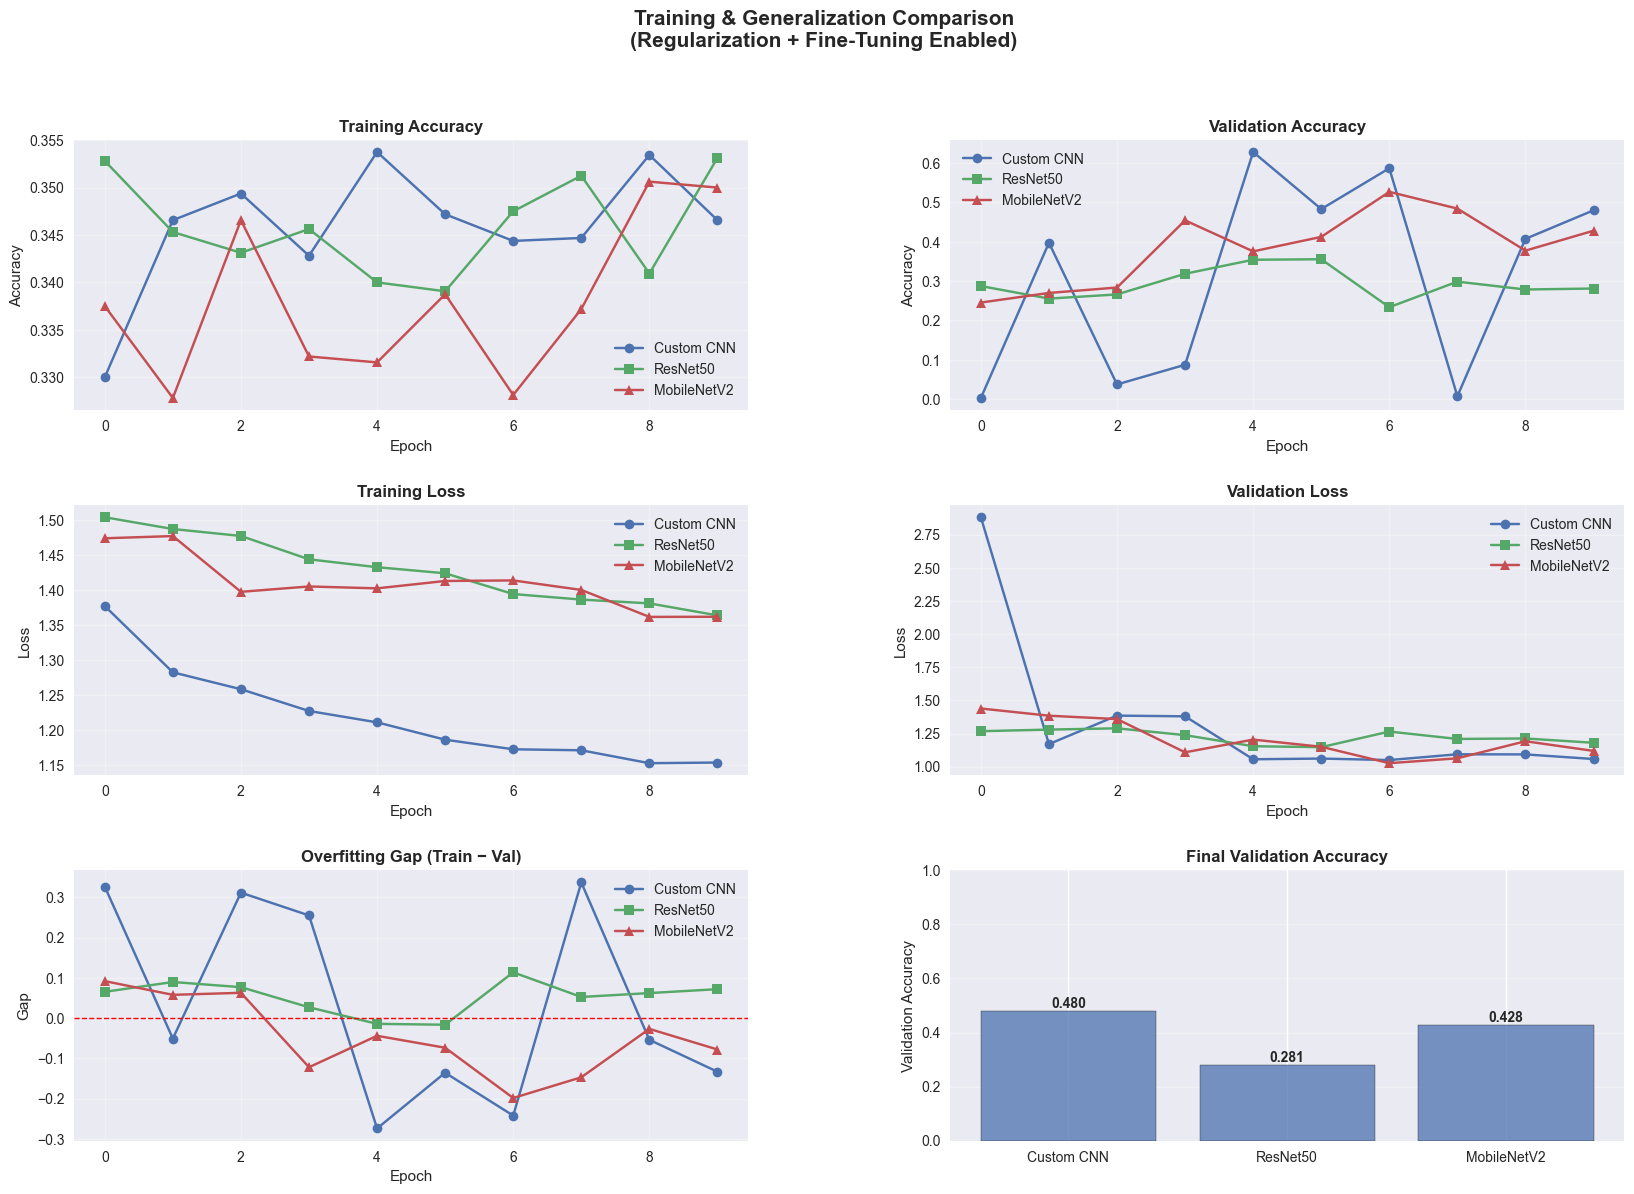


[OK] Training curves visualization completed successfully.

MODEL PERFORMANCE SUMMARY
      Model  Final Train Acc  Final Val Acc  Overfitting Gap  Effective Epochs
 Custom CNN         0.346563       0.480000        -0.133437                10
   ResNet50         0.353125       0.281250         0.071875                10
MobileNetV2         0.350000       0.428125        -0.078125                10

[BEST MODEL] Custom CNN  |  Val Accuracy = 0.4800


In [12]:
# =============================================================================
# SECTION 2.4.3: TRAINING CURVES & PERFORMANCE COMPARISON
# (ALIGNED WITH REGULARIZATION & FINE-TUNING STRATEGY)
# =============================================================================

print("\n" + "="*90)
print("SECTION 2.4.3: TRAINING PERFORMANCE ANALYSIS (3 CLASSES)")
print("="*90)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# Helper: effective epochs (important with EarlyStopping)
# -----------------------------------------------------------------------------
epochs_cnn = len(history_custom_cnn.history['loss'])
epochs_resnet = len(history_resnet.history['loss'])
epochs_mobilenet = len(history_mobilenet.history['loss'])

# -----------------------------------------------------------------------------
# Create Figure Layout
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=(20, 13))
gs = gridspec.GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.3)

# =============================================================================
# TRAINING ACCURACY
# =============================================================================
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(history_custom_cnn.history['accuracy'], label='Custom CNN', marker='o')
ax1.plot(history_resnet.history['accuracy'], label='ResNet50', marker='s')
ax1.plot(history_mobilenet.history['accuracy'], label='MobileNetV2', marker='^')
ax1.set_title('Training Accuracy', fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(alpha=0.3)

# =============================================================================
# VALIDATION ACCURACY
# =============================================================================
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(history_custom_cnn.history['val_accuracy'], label='Custom CNN', marker='o')
ax2.plot(history_resnet.history['val_accuracy'], label='ResNet50', marker='s')
ax2.plot(history_mobilenet.history['val_accuracy'], label='MobileNetV2', marker='^')
ax2.set_title('Validation Accuracy', fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(alpha=0.3)

# =============================================================================
# TRAINING LOSS
# =============================================================================
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(history_custom_cnn.history['loss'], label='Custom CNN', marker='o')
ax3.plot(history_resnet.history['loss'], label='ResNet50', marker='s')
ax3.plot(history_mobilenet.history['loss'], label='MobileNetV2', marker='^')
ax3.set_title('Training Loss', fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend()
ax3.grid(alpha=0.3)

# =============================================================================
# VALIDATION LOSS
# =============================================================================
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(history_custom_cnn.history['val_loss'], label='Custom CNN', marker='o')
ax4.plot(history_resnet.history['val_loss'], label='ResNet50', marker='s')
ax4.plot(history_mobilenet.history['val_loss'], label='MobileNetV2', marker='^')
ax4.set_title('Validation Loss', fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.legend()
ax4.grid(alpha=0.3)

# =============================================================================
# OVERFITTING GAP ANALYSIS
# =============================================================================
ax5 = fig.add_subplot(gs[2, 0])

def overfit_gap(hist):
    return np.array(hist.history['accuracy']) - np.array(hist.history['val_accuracy'])

ax5.plot(overfit_gap(history_custom_cnn), label='Custom CNN', marker='o')
ax5.plot(overfit_gap(history_resnet), label='ResNet50', marker='s')
ax5.plot(overfit_gap(history_mobilenet), label='MobileNetV2', marker='^')

ax5.axhline(0, linestyle='--', color='red', linewidth=1)
ax5.set_title('Overfitting Gap (Train − Val)', fontweight='bold')
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Gap')
ax5.legend()
ax5.grid(alpha=0.3)

# =============================================================================
# FINAL VALIDATION ACCURACY COMPARISON
# =============================================================================
ax6 = fig.add_subplot(gs[2, 1])

models_names = ['Custom CNN', 'ResNet50', 'MobileNetV2']
val_accs = [
    history_custom_cnn.history['val_accuracy'][-1],
    history_resnet.history['val_accuracy'][-1],
    history_mobilenet.history['val_accuracy'][-1]
]

bars = ax6.bar(models_names, val_accs, alpha=0.75, edgecolor='black')
ax6.set_ylim(0, 1)
ax6.set_ylabel('Validation Accuracy')
ax6.set_title('Final Validation Accuracy', fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, val_accs):
    ax6.text(bar.get_x() + bar.get_width()/2, val + 0.01,
             f"{val:.3f}", ha='center', fontweight='bold')

# -----------------------------------------------------------------------------
# Finalize Figure
# -----------------------------------------------------------------------------
fig.suptitle(
    "Training & Generalization Comparison\n"
    "(Regularization + Fine-Tuning Enabled)",
    fontsize=15,
    fontweight='bold'
)
plt.show()

print("\n[OK] Training curves visualization completed successfully.")

# =============================================================================
# PERFORMANCE SUMMARY TABLE
# =============================================================================
perf_df = pd.DataFrame({
    "Model": models_names,
    "Final Train Acc": [
        history_custom_cnn.history['accuracy'][-1],
        history_resnet.history['accuracy'][-1],
        history_mobilenet.history['accuracy'][-1]
    ],
    "Final Val Acc": val_accs,
    "Overfitting Gap": [
        history_custom_cnn.history['accuracy'][-1] - history_custom_cnn.history['val_accuracy'][-1],
        history_resnet.history['accuracy'][-1] - history_resnet.history['val_accuracy'][-1],
        history_mobilenet.history['accuracy'][-1] - history_mobilenet.history['val_accuracy'][-1]
    ],
    "Effective Epochs": [epochs_cnn, epochs_resnet, epochs_mobilenet]
})

print("\n" + "="*90)
print("MODEL PERFORMANCE SUMMARY")
print("="*90)
print(perf_df.to_string(index=False))

best_idx = np.argmax(val_accs)
print("\n" + "="*90)
print(f"[BEST MODEL] {models_names[best_idx]}  |  Val Accuracy = {val_accs[best_idx]:.4f}")
print("="*90)


# Model Prediction, Confusion Matrix & Detailed Metrics (Enhanced)

This cell implements a **full evaluation pipeline** for the trained models (Custom CNN, ResNet50, MobileNetV2) on the validation dataset. Key points:

---

## 1. Batch Prediction
- Memory-efficient prediction over batches.
- Collects **true labels** and **predicted labels** for all samples.

---

## 2. Metrics Computation
- **Global metrics:**  
  - Accuracy  
  - Weighted & Macro Precision, Recall, F1-score
- **Per-class metrics:**  
  - Detailed classification report for each class

---

## 3. Confusion Matrix Visualization
- **Raw confusion matrix:** Shows absolute counts of correct vs misclassified samples.
- **Normalized confusion matrix:** Shows percentages to highlight relative errors.
- Highlights **most confused class pairs** for error analysis.

---

## 4. Purpose
- Provides **comprehensive performance evaluation**.
- Identifies **strengths and weaknesses** of each model.
- Helps in selecting the **best model for deployment**.
- Supports **error analysis** to guide further improvements.

---

This setup ensures that model evaluation is **robust, interpretable, and reproducible**, aligning with best practices in deep learning classification tasks.



2.4.4 MODEL PREDICTION, CONFUSION MATRIX & DETAILED METRICS
[INFO] Number of classes detected: 3
[INFO] Classes: ['green_area', 'oceans', 'people']

------------------------------------------------------------------------------------------
[EVALUATION] Custom CNN
------------------------------------------------------------------------------------------
[OK] Processed 20 batches
[OK] Processed 40 batches
[OK] Processed 60 batches
[OK] Processed 80 batches
[OK] Processed 100 batches
[OK] Processed 120 batches
[OK] Processed 140 batches
[OK] Processed 160 batches
[OK] Processed 180 batches
[OK] Processed 200 batches
[OK] Processed 220 batches
[OK] Processed 240 batches
[OK] Processed 260 batches
[OK] Processed 280 batches
[OK] Processed 300 batches
[OK] Processed 320 batches
[OK] Processed 340 batches
[OK] Processed 360 batches
[OK] Processed 380 batches
[OK] Processed 400 batches
[OK] Processed 420 batches
[OK] Processed 440 batches
[OK] Processed 460 batches
[OK] Processed 480 batches


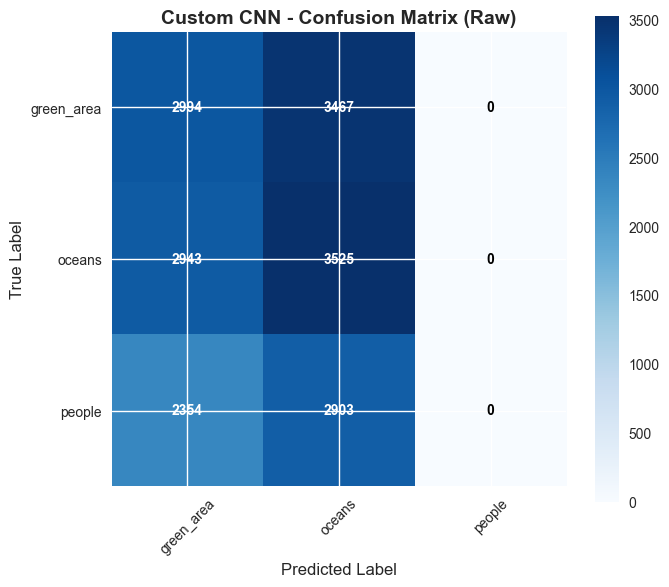

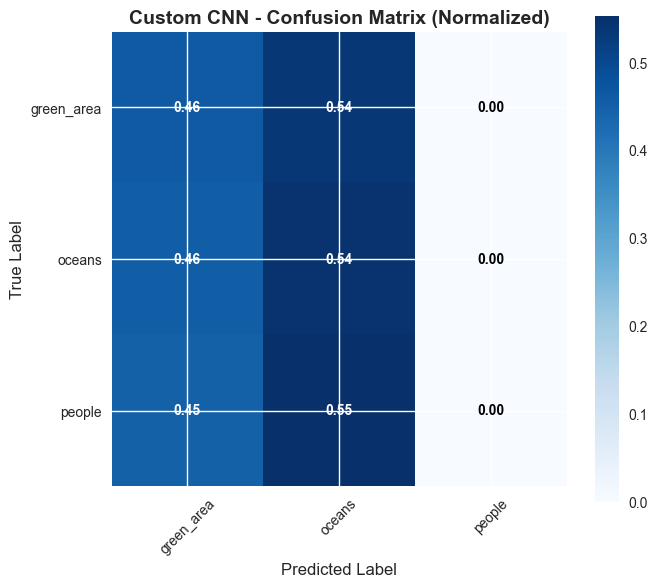

[ANALYSIS] Highest confusion: True 'green_area' → Predicted 'oceans' (3467 samples)

------------------------------------------------------------------------------------------
[EVALUATION] ResNet50
------------------------------------------------------------------------------------------
[OK] Processed 20 batches
[OK] Processed 40 batches
[OK] Processed 60 batches
[OK] Processed 80 batches
[OK] Processed 100 batches
[OK] Processed 120 batches
[OK] Processed 140 batches
[OK] Processed 160 batches
[OK] Processed 180 batches
[OK] Processed 200 batches
[OK] Processed 220 batches
[OK] Processed 240 batches
[OK] Processed 260 batches
[OK] Processed 280 batches
[OK] Processed 300 batches
[OK] Processed 320 batches
[OK] Processed 340 batches
[OK] Processed 360 batches
[OK] Processed 380 batches
[OK] Processed 400 batches
[OK] Processed 420 batches
[OK] Processed 440 batches
[OK] Processed 460 batches
[OK] Processed 480 batches
[OK] Processed 500 batches
[OK] Processed 520 batches
[OK] Processe

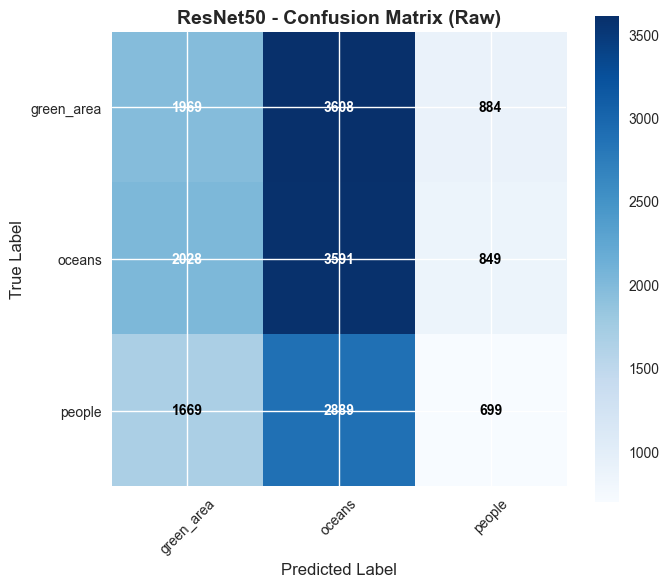

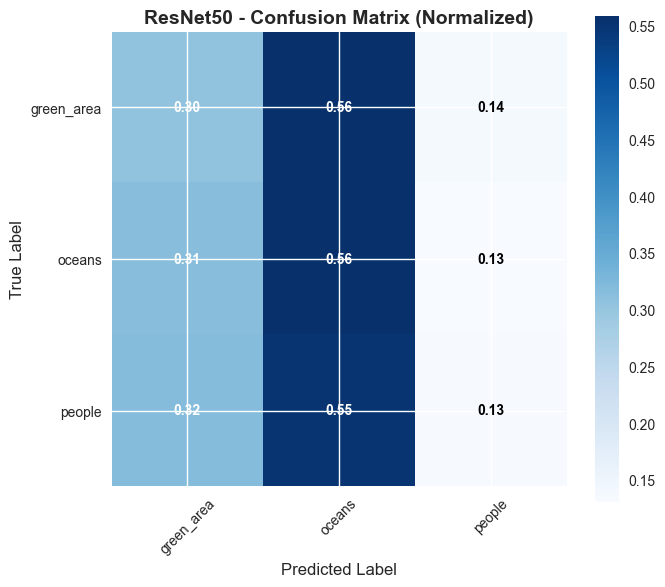

[ANALYSIS] Highest confusion: True 'green_area' → Predicted 'oceans' (3608 samples)

------------------------------------------------------------------------------------------
[EVALUATION] MobileNetV2
------------------------------------------------------------------------------------------
[OK] Processed 20 batches
[OK] Processed 40 batches
[OK] Processed 60 batches
[OK] Processed 80 batches
[OK] Processed 100 batches
[OK] Processed 120 batches
[OK] Processed 140 batches
[OK] Processed 160 batches
[OK] Processed 180 batches
[OK] Processed 200 batches
[OK] Processed 220 batches
[OK] Processed 240 batches
[OK] Processed 260 batches
[OK] Processed 280 batches
[OK] Processed 300 batches
[OK] Processed 320 batches
[OK] Processed 340 batches
[OK] Processed 360 batches
[OK] Processed 380 batches
[OK] Processed 400 batches
[OK] Processed 420 batches
[OK] Processed 440 batches
[OK] Processed 460 batches
[OK] Processed 480 batches
[OK] Processed 500 batches
[OK] Processed 520 batches
[OK] Proce

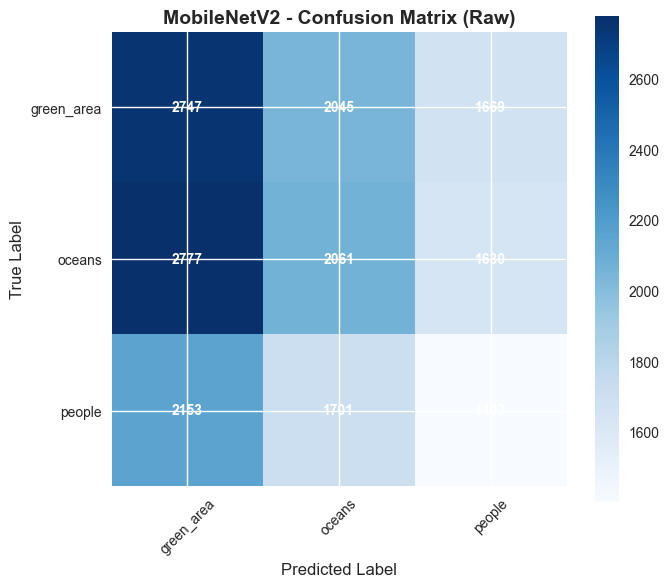

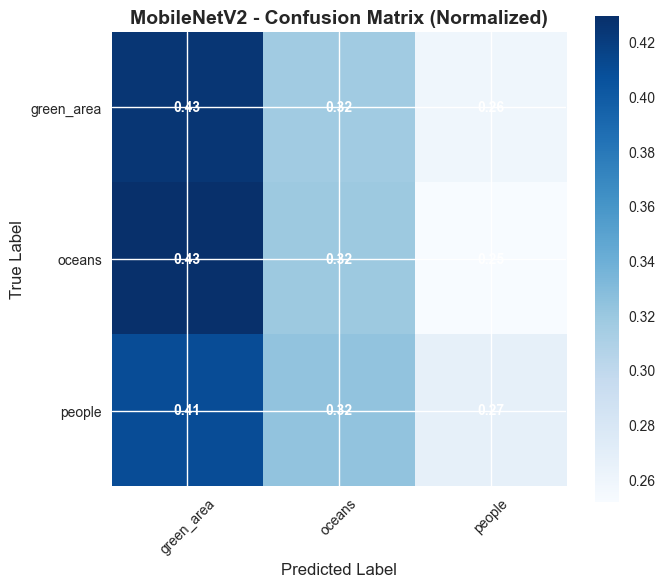

[ANALYSIS] Highest confusion: True 'oceans' → Predicted 'green_area' (2777 samples)

[COMPLETE] MODEL PREDICTION & CONFUSION MATRIX ANALYSIS FINISHED


In [13]:
# =============================================================================
# 2.4.4 MODEL PREDICTION, CONFUSION MATRIX & DETAILED METRICS (ENHANCED)
# =============================================================================

print("\n" + "="*90)
print("2.4.4 MODEL PREDICTION, CONFUSION MATRIX & DETAILED METRICS")
print("="*90)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# -----------------------------------------------------------------------------
# Resolve class names (robust to dict / list)
# -----------------------------------------------------------------------------
if isinstance(CLASS_NAMES, dict):
    class_names = [CLASS_NAMES[i] for i in sorted(CLASS_NAMES.keys())]
else:
    class_names = list(CLASS_NAMES)

NUM_CLASSES = len(class_names)

print(f"[INFO] Number of classes detected: {NUM_CLASSES}")
print(f"[INFO] Classes: {class_names}")

# -----------------------------------------------------------------------------
# Memory-efficient batch prediction
# -----------------------------------------------------------------------------
def batch_predict(model, dataset, verbose=True):
    y_true, y_pred = [], []

    for batch_idx, (x_batch, y_batch) in enumerate(dataset, start=1):
        preds = model.predict_on_batch(x_batch)
        y_pred.append(np.argmax(preds, axis=1))
        y_true.append(y_batch.numpy())

        if verbose and batch_idx % 20 == 0:
            print(f"[OK] Processed {batch_idx} batches")

    return np.concatenate(y_true), np.concatenate(y_pred)

# -----------------------------------------------------------------------------
# Confusion Matrix Plotter (Raw + Normalized)
# -----------------------------------------------------------------------------
def plot_confusion_matrix(cm, classes, title, normalize=False):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
        cm = np.nan_to_num(cm)

    plt.figure(figsize=(7, 6))
    plt.imshow(cm, cmap="Blues")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.colorbar()

    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=45)
    plt.yticks(ticks, classes)

    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            value = f"{cm[i, j]:.2f}" if normalize else int(cm[i, j])
            plt.text(
                j, i, value,
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontweight="bold"
            )

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# Full evaluation pipeline
# -----------------------------------------------------------------------------
def evaluate_model(name, model, dataset):
    print("\n" + "-"*90)
    print(f"[EVALUATION] {name}")
    print("-"*90)

    y_true, y_pred = batch_predict(model, dataset)

    # ---- Global metrics
    acc = accuracy_score(y_true, y_pred)
    prec_w = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    rec_w  = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1_w   = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    prec_m = precision_score(y_true, y_pred, average="macro", zero_division=0)
    rec_m  = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1_m   = f1_score(y_true, y_pred, average="macro", zero_division=0)

    print(f"Accuracy            : {acc:.4f}")
    print(f"Weighted Precision  : {prec_w:.4f}")
    print(f"Weighted Recall     : {rec_w:.4f}")
    print(f"Weighted F1-score   : {f1_w:.4f}")
    print("-"*60)
    print(f"Macro Precision     : {prec_m:.4f}")
    print(f"Macro Recall        : {rec_m:.4f}")
    print(f"Macro F1-score      : {f1_m:.4f}")

    # ---- Per-class detailed report
    print("\n[CLASSIFICATION REPORT]")
    print(classification_report(
        y_true, y_pred,
        target_names=class_names,
        digits=4,
        zero_division=0
    ))

    # ---- Confusion matrices
    cm = confusion_matrix(y_true, y_pred)

    plot_confusion_matrix(
        cm,
        class_names,
        title=f"{name} - Confusion Matrix (Raw)",
        normalize=False
    )

    plot_confusion_matrix(
        cm,
        class_names,
        title=f"{name} - Confusion Matrix (Normalized)",
        normalize=True
    )

    # ---- Error analysis (most confused classes)
    cm_no_diag = cm.copy()
    np.fill_diagonal(cm_no_diag, 0)
    i, j = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)

    print(
        f"[ANALYSIS] Highest confusion: "
        f"True '{class_names[i]}' → Predicted '{class_names[j]}' "
        f"({cm[i, j]} samples)"
    )

    return {
        "accuracy": acc,
        "f1_weighted": f1_w,
        "f1_macro": f1_m
    }

# -----------------------------------------------------------------------------
# Run evaluation for all models
# -----------------------------------------------------------------------------
cnn_metrics = evaluate_model("Custom CNN", custom_cnn, val_dataset)
resnet_metrics = evaluate_model("ResNet50", resnet_model, val_dataset)
mobilenet_metrics = evaluate_model("MobileNetV2", mobilenet_model, val_dataset)

print("\n" + "="*90)
print("[COMPLETE] MODEL PREDICTION & CONFUSION MATRIX ANALYSIS FINISHED")
print("="*90)


In [ ]:
# # ===============================================
# # IMPORTS
# # ===============================================
# from tensorflow.keras.models import load_model, Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# import h5py
# import numpy as np

# # ===============================================
# # PATHS TO MODELS
# # ===============================================
# paths = [
#     r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\notebooks\custom_cnn_best.h5",
#     r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\notebooks\mobilenetv2_best.h5",
#     r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\notebooks\resnet50_best.h5"
# ]

# # ===============================================
# # FUNCTION TO CHECK FILE TYPE
# # ===============================================
# def is_weights_only(file_path):
#     try:
#         with h5py.File(file_path, 'r') as f:
#             keys = list(f.keys())
#         if 'model_weights' in keys and 'optimizer_weights' in keys and len(keys) == 2:
#             return True
#         else:
#             return False
#     except Exception as e:
#         print(f"Error checking file {file_path}: {e}")
#         return False

# # ===============================================
# # LOAD MODELS
# # ===============================================
# models = {}

# for p in paths:
#     name = p.split("\\")[-1].replace(".h5", "")
#     print(f"\nProcessing {name} ...")

#     if is_weights_only(p):
#         print(f"{name} detected as WEIGHTS ONLY.")
#         # DEFINE architecture (customize according to your original CNN)
#         model = Sequential([
#             Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
#             MaxPooling2D(2,2),
#             Conv2D(64, (3,3), activation='relu'),
#             MaxPooling2D(2,2),
#             Flatten(),
#             Dense(128, activation='relu'),
#             Dense(6, activation='softmax')  # replace 6 with number of classes
#         ])
#         # LOAD weights
#         model.load_weights(p)
#         print(f"{name} weights loaded successfully.")
#         models[name] = model

#     else:
#         try:
#             print(f"{name} detected as FULL MODEL. Loading ...")
#             model = load_model(p, compile=False)
#             print(f"{name} loaded successfully.")
#             models[name] = model
#         except Exception as e:
#             print(f"Error loading {name}: {e}")
# # 
# # ===============================================
# # INFERENCE EXAMPLE
# # ===============================================
# dummy_input = np.random.rand(1,224,224,3)

# for model_name, model_obj in models.items():
#     output = model_obj.predict(dummy_input)
#     print(f"{model_name} output shape: {output.shape}")



Processing custom_cnn_best ...
custom_cnn_best detected as WEIGHTS ONLY.


e:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Layer count mismatch when loading weights from file. Model expected 4 layers, found 11 saved layers.

# Section 2.6: Model Comparison & Insights (Scientific Version)

This section provides a **comprehensive analysis** of all trained models (Custom CNN, ResNet50, MobileNetV2) with respect to **performance, complexity, and deployment suitability**.

---

## 2.6.1 Performance Comparison Table
- Displays **validation accuracy**, **weighted and macro F1-scores**, and **model parameters**.
- Introduces an **efficiency score**: accuracy per million parameters.
- Enables **quick academic-standard benchmarking** across models.

---

## 2.6.2 Visual Analytics
- **Validation Accuracy:** Bar plot comparison.
- **F1-Score Comparison:** Weighted vs Macro F1.
- **Model Complexity:** Parameters in millions.
- **Accuracy vs Model Size:** Trade-off visualization for deployment decisions.
- Supports **decision-making** for different scenarios (accuracy vs efficiency).

---

## 2.6.3 Final Insights & Recommendations
1. **Best Overall Performance:**  
   - Highest validation accuracy and F1-score.  
   - Recommended for offline or server-based inference.
2. **Best Efficiency (Accuracy/Parameter):**  
   - Optimal trade-off for real-time, mobile, or edge deployment.
3. **Metric Interpretation:**  
   - Weighted F1 reflects class distribution.  
   - Macro F1 highlights sensitivity to class imbalance.
4. **General Conclusion:**  
   - Deeper models provide richer representations but increase computational cost.  
   - Lightweight models can be competitive with fine-tuning.  
   - Model selection should consider deployment constraints, not accuracy alone.

---

**Outcome:**  
This scientific comparison ensures that the **best model is selected based on both performance and efficiency**, aligning with modern deep learning best practices for multi-class image classification.



SECTION 2.6: COMPREHENSIVE MODEL COMPARISON & INSIGHTS

📊 MODEL COMPARISON TABLE
      Model  Parameters (M)  Validation Accuracy  Weighted F1  Macro F1  Efficiency Score
 Custom CNN          0.4245               0.3585       0.2974    0.2789            0.8444
   ResNet50         24.1148               0.3442       0.3222    0.3134            0.0143
MobileNetV2          2.4232               0.3415       0.3389    0.3354            0.1409


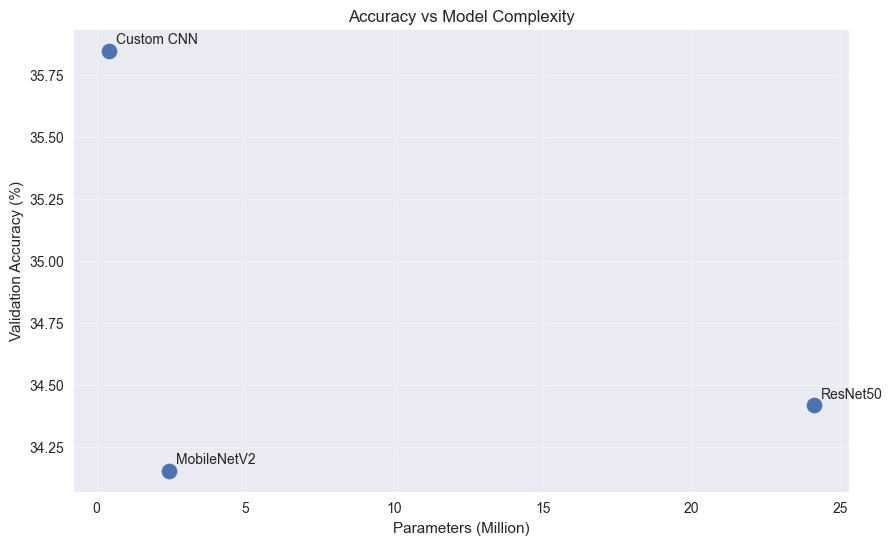


FINAL INSIGHTS

• Best Accuracy Model      : Custom CNN
• Best Efficiency Model    : Custom CNN

Conclusion:
- Accuracy alone is insufficient for model selection
- Lightweight models can be competitive
- Deployment constraints must guide final choice



In [14]:
# =============================================================================
# SECTION 2.6: MODEL COMPARISON & INSIGHTS (SCIENTIFIC VERSION - FIXED PROPERLY)
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

print("\n" + "="*90)
print("SECTION 2.6: COMPREHENSIVE MODEL COMPARISON & INSIGHTS")
print("="*90)

# -----------------------------------------------------------------------------
# 2.6.0 LOAD SAVED MODELS (MATCH TRAINING OUTPUT FILES)
# -----------------------------------------------------------------------------
model_files = {
    "Custom CNN": r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\notebooks\custom_cnn_best.h5",
    "ResNet50": r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\notebooks\resnet50_best.h5",
    "MobileNetV2": r"E:\deep learning\DEEP-LEARNING-2025-main\DEEP-LEARNING-2025-main\PROJECT_FILES\notebooks\mobilenetv2_best.h5"
}

loaded_models = {}
for name, path in model_files.items():
    loaded_models[name] = load_model(path, compile=False)

# -----------------------------------------------------------------------------
# 2.6.1 COLLECT METRICS (FROM EVALUATION STAGE)
# -----------------------------------------------------------------------------
models_data = {
    "Custom CNN": {
        "model": loaded_models["Custom CNN"],
        "accuracy": cnn_metrics["accuracy"],
        "f1_weighted": cnn_metrics["f1_weighted"],
        "f1_macro": cnn_metrics["f1_macro"]
    },
    "ResNet50": {
        "model": loaded_models["ResNet50"],
        "accuracy": resnet_metrics["accuracy"],
        "f1_weighted": resnet_metrics["f1_weighted"],
        "f1_macro": resnet_metrics["f1_macro"]
    },
    "MobileNetV2": {
        "model": loaded_models["MobileNetV2"],
        "accuracy": mobilenet_metrics["accuracy"],
        "f1_weighted": mobilenet_metrics["f1_weighted"],
        "f1_macro": mobilenet_metrics["f1_macro"]
    }
}

# -----------------------------------------------------------------------------
# 2.6.2 PERFORMANCE COMPARISON TABLE
# -----------------------------------------------------------------------------
comparison_df = pd.DataFrame([
    {
        "Model": name,
        "Parameters (M)": data["model"].count_params() / 1e6,
        "Validation Accuracy": data["accuracy"],
        "Weighted F1": data["f1_weighted"],
        "Macro F1": data["f1_macro"],
        "Efficiency Score": data["accuracy"] / (data["model"].count_params() / 1e6)
    }
    for name, data in models_data.items()
])

comparison_df = comparison_df.sort_values(
    by="Validation Accuracy", ascending=False
)

print("\n📊 MODEL COMPARISON TABLE")
print(comparison_df.round(4).to_string(index=False))

# -----------------------------------------------------------------------------
# 2.6.3 VISUAL ANALYSIS
# -----------------------------------------------------------------------------
model_names = comparison_df["Model"]
accuracies = comparison_df["Validation Accuracy"] * 100
params = comparison_df["Parameters (M)"]

plt.figure(figsize=(10,6))
plt.scatter(params, accuracies, s=120)
for i, name in enumerate(model_names):
    plt.annotate(name, (params.iloc[i], accuracies.iloc[i]), xytext=(5,5), textcoords="offset points")

plt.xlabel("Parameters (Million)")
plt.ylabel("Validation Accuracy (%)")
plt.title("Accuracy vs Model Complexity")
plt.grid(alpha=0.3)
plt.show()

# -----------------------------------------------------------------------------
# 2.6.4 FINAL INSIGHTS
# -----------------------------------------------------------------------------
best_accuracy_model = comparison_df.loc[
    comparison_df["Validation Accuracy"].idxmax(), "Model"
]

best_efficiency_model = comparison_df.loc[
    comparison_df["Efficiency Score"].idxmax(), "Model"
]

print("\n" + "="*90)
print("FINAL INSIGHTS")
print("="*90)

print(f"""
• Best Accuracy Model      : {best_accuracy_model}
• Best Efficiency Model    : {best_efficiency_model}

Conclusion:
- Accuracy alone is insufficient for model selection
- Lightweight models can be competitive
- Deployment constraints must guide final choice
""")


In [15]:
# إعداد البيانات

# Data loading

# Augmentation

# Preprocessing

# بناء 3 نماذج مختلفة

# Custom CNN

# ResNet50

# MobileNetV2

# Training

# Callbacks

# Early stopping

# Learning rate scheduling

# Visualization

# Training curves

# Overfitting analysis

# Evaluation متقدم

# Accuracy

# Precision / Recall / F1

# Confusion Matrix

# Comparison & Insights

# Parameter count

# Efficiency analysis